<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/ML2101%E6%9C%9F_WEEK2_%E9%81%A0%E8%97%A4%E4%BC%B8_%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C4_%E3%83%80%E3%83%BC%E3%83%84%E6%8A%95%E3%81%92%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【問題1】ダーツのまとを選ぶ

In [ ]:
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rc = np.random.choice(6, 100) + 1
rc

array([1, 6, 1, 1, 2, 1, 6, 2, 4, 3, 6, 4, 3, 3, 2, 6, 5, 6, 5, 1, 1, 1,
       2, 5, 1, 1, 2, 3, 4, 1, 1, 6, 6, 1, 5, 4, 4, 1, 5, 6, 4, 4, 5, 2,
       5, 4, 5, 6, 6, 1, 1, 3, 3, 1, 3, 2, 6, 4, 1, 5, 5, 5, 1, 1, 6, 5,
       5, 2, 4, 1, 5, 1, 1, 4, 6, 6, 2, 5, 1, 4, 2, 4, 6, 2, 1, 5, 6, 6,
       1, 3, 1, 6, 2, 1, 1, 2, 3, 5, 4, 5])

【問題2】ダーツを投げて、刺さった場所を記録する

[3]番目のダーツ


(2.5, 3.5)

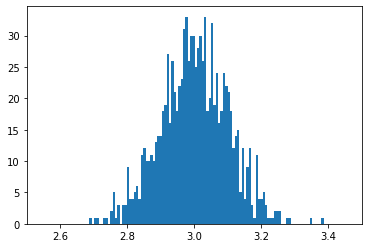

In [ ]:
rc = np.random.choice(6,1)+1
print("{}番目のダーツ".format(rc))
a = np.random.normal(
    loc   = rc,      # 平均
    scale = 0.1,      # 標準偏差
    size  = 1000,# 出力配列のサイズ(タプルも可)
)
plt.hist(a,bins=100)
plt.xlim(rc-0.5, rc+0.5)

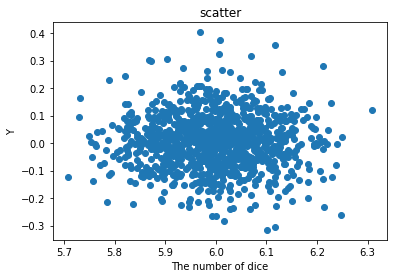

In [ ]:
mu = (int(rc), 0)
sigma = ([0.01, 0], [0, 0.01]) #偏差
values = multivariate_normal(mu, sigma, 1000)

values_X1 = []
values_X2 = []
for i in range(len(values)):
  values_X1.append(values[i,0])
  values_X2.append(values[i,1])

plt.xlabel("The number of dice")
plt.ylabel("Y")
plt.title("scatter")
plt.scatter(values_X1, values_X2)

【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する

In [ ]:
kaisuu = 1000
rc = np.random.choice(6, kaisuu)
data_dict = []
keys = ["ダーツ","X軸","Y軸"]
for i in range(len(rc)):
  rc[i] += 1
  mu = (rc[i], 0)
  sigma = ([0.01, 0], [0, 0.01]) #偏差
  values = multivariate_normal(mu, sigma, kaisuu)
  data_dict.append(dict(zip(keys, np.append(rc[i],values[i]))))

In [ ]:
data_dict

[{'ダーツ': 1.0, 'X軸': 0.9138456245644486, 'Y軸': -0.23642363321721357},
 {'ダーツ': 4.0, 'X軸': 4.087099119941259, 'Y軸': -0.03357791478388232},
 {'ダーツ': 5.0, 'X軸': 4.979833742486092, 'Y軸': 0.04315429439390374},
 {'ダーツ': 6.0, 'X軸': 5.904517397529053, 'Y軸': -0.08878563068171169},
 {'ダーツ': 2.0, 'X軸': 2.1274158032090753, 'Y軸': 0.05578129557084747},
 {'ダーツ': 2.0, 'X軸': 2.1918098821536236, 'Y軸': 0.02858699766266065},
 {'ダーツ': 3.0, 'X軸': 2.961999839362457, 'Y軸': -0.07186078282758036},
 {'ダーツ': 5.0, 'X軸': 4.850305321440009, 'Y軸': -0.09494078129700857},
 {'ダーツ': 4.0, 'X軸': 4.024660163946012, 'Y軸': 0.08635287909432197},
 {'ダーツ': 5.0, 'X軸': 5.068022097666167, 'Y軸': 0.20865883388451195},
 {'ダーツ': 3.0, 'X軸': 2.8958717511221015, 'Y軸': -0.1657396116810924},
 {'ダーツ': 5.0, 'X軸': 4.9997309177298686, 'Y軸': -0.0015190234343604725},
 {'ダーツ': 5.0, 'X軸': 5.048953168544059, 'Y軸': -0.0065738397101331204},
 {'ダーツ': 1.0, 'X軸': 1.1190582168586607, 'Y軸': 0.21668776723049601},
 {'ダーツ': 2.0, 'X軸': 2.061080938028033, 'Y軸': 

【問題4】ダーツのまとと刺さった位置を描画する

【問題5】関数化

In [ ]:
def rd_choice(darts, kaisuu):
  return np.random.choice(darts, kaisuu) + 1
rd_choice(10, 100)

array([ 3, 10,  3,  7,  4,  6,  2,  9, 10,  2,  2,  3,  8,  8,  7,  7,  8,
        2,  8,  1,  8,  5,  7,  4,  8,  1,  8,  5,  7,  3, 10,  9,  2,  8,
       10,  7,  9,  7,  1,  2,  2,  6,  1,  9,  5,  4, 10, 10,  4,  2,  4,
        4,  6,  2,  1,  2,  3,  3,  8,  7, 10,  4,  8,  5,  3,  4,  8,  4,
        7,  4,  5,  5,  9,  5,  7,  9,  1, 10,  5,  6,  3,  6,  5,  9,  4,
        3,  6,  4,  1,  6,  8,  8, 10,  9,  6,  5,  3,  1,  7,  1])

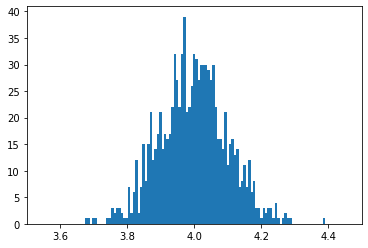

In [ ]:
def rd_choice_2(darts, kaisuu):
  rc = np.random.choice(darts,1)+1
  a = np.random.normal(
      loc   = rc,      # 平均
      scale = 0.1,      # 標準偏差
      size  = kaisuu,# 出力配列のサイズ(タプルも可)
  )
  plt.hist(a,bins=kaisuu // 10)
  plt.xlim(rc-0.5, rc+0.5)
rd_choice_2(6, 1000)

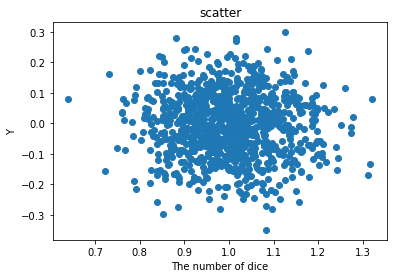

In [ ]:
def ml_normal(darts, kaisuu):
  rc = np.random.choice(darts,1)+1  
  mu = (int(rc), 0)
  sigma = ([0.01, 0], [0, 0.01]) #偏差
  values = multivariate_normal(mu, sigma, kaisuu)

  values_X1 = []
  values_X2 = []
  for i in range(len(values)):
    values_X1.append(values[i,0])
    values_X2.append(values[i,1])

  plt.xlabel("The number of dice")
  plt.ylabel("Y")
  plt.title("scatter")
  plt.scatter(values_X1, values_X2)
ml_normal(6, 1000)

In [ ]:
def rd_choice_3(darts, kaisuu):
  rc = np.random.choice(darts, kaisuu)
  data_dict = []
  keys = ["ダーツ","X軸","Y軸"]
  for i in range(len(rc)):
    rc[i] += 1
    mu = (rc[i], 0)
    sigma = ([0.01, 0], [0, 0.01]) #偏差
    values = multivariate_normal(mu, sigma, kaisuu)
    data_dict.append(dict(zip(keys, np.append(rc[i],values[i]))))
  return data_dict
rd_choice_3(6, 10)

[{'ダーツ': 2.0, 'X軸': 1.9342510848998828, 'Y軸': 0.08697895973614393},
 {'ダーツ': 3.0, 'X軸': 2.9399372877692023, 'Y軸': -0.03436565930112558},
 {'ダーツ': 1.0, 'X軸': 0.9137390380775586, 'Y軸': -0.041702021583335934},
 {'ダーツ': 2.0, 'X軸': 1.9313004003082634, 'Y軸': -0.22965207377439373},
 {'ダーツ': 4.0, 'X軸': 3.9525961278590005, 'Y軸': 0.09880903283607152},
 {'ダーツ': 6.0, 'X軸': 6.02360906030103, 'Y軸': 0.17154419424676096},
 {'ダーツ': 1.0, 'X軸': 1.0700499733619253, 'Y軸': 0.014245880764371225},
 {'ダーツ': 1.0, 'X軸': 1.0875397736910897, 'Y軸': 0.10632137633874823},
 {'ダーツ': 4.0, 'X軸': 3.999644664656644, 'Y軸': 0.012183824747449189},
 {'ダーツ': 4.0, 'X軸': 3.9326101669586873, 'Y軸': -0.09210592926134376}]